<a href="https://colab.research.google.com/github/aswinp-kumar/diabetes-prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
import pandas as pd

data_df= pd.read_csv('/content/test_diabetes.csv',sep=';')

data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,180,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,Zero,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112,26.2,0.245,30.0,N
766,1.0,126.0,60.0,0.0,Zero,30.1,0.349,47.0,1


In [7]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1


In [8]:
data_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   717 non-null    object 
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(7), object(2)
memory usage: 54.1+ KB


In [10]:
data_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,731.000000,730.000000,734.000000,734.000000,733.000000,728.000000,717.000000
mean,3.824897,121.152055,69.008174,20.848774,31.979536,0.472702,34.108787
std,3.369400,31.774802,19.496036,15.876665,7.918709,0.331714,16.119730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,-1.000000
25%,1.000000,99.000000,64.000000,0.000000,27.400000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,32.000000,36.500000,0.624500,41.000000
max,17.000000,198.000000,122.000000,99.000000,67.100000,2.420000,200.000000


In [11]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,731.0,3.824897,3.369400,0.000,1.000,3.0000,6.0000,17.00
Glucose,730.0,121.152055,31.774802,0.000,99.000,117.0000,141.0000,198.00
BloodPressure,734.0,69.008174,19.496036,0.000,64.000,72.0000,80.0000,122.00
SkinThickness,734.0,20.848774,15.876665,0.000,0.000,23.0000,32.0000,99.00
BMI,733.0,31.979536,7.918709,0.000,27.400,32.0000,36.5000,67.10
DiabetesPedigreeFunction,728.0,0.472702,0.331714,0.078,0.245,0.3725,0.6245,2.42
Age,717.0,34.108787,16.119730,-1.000,24.000,29.0000,41.0000,200.00


In [12]:
#checking null value

In [13]:
data_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,True,False
5,False,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False


In [14]:
data_df.isnull().sum()

Pregnancies                 37
Glucose                     38
BloodPressure               34
SkinThickness               34
Insulin                     51
BMI                         35
DiabetesPedigreeFunction    40
Age                         51
Outcome                      0
dtype: int64

In [39]:
#Duplicating the dataset
data_df_copy = data_df.copy(deep = True)

In [40]:
#replacing unwanted data with NaN

In [41]:
data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace('Zero',np.NaN)
data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace('0',np.NaN)
data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = data_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [42]:
data_df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,NaN,NaN,40.0,35.0,168,43.1,2.288,NaN,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,180,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112,26.2,0.245,30.0,N
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1


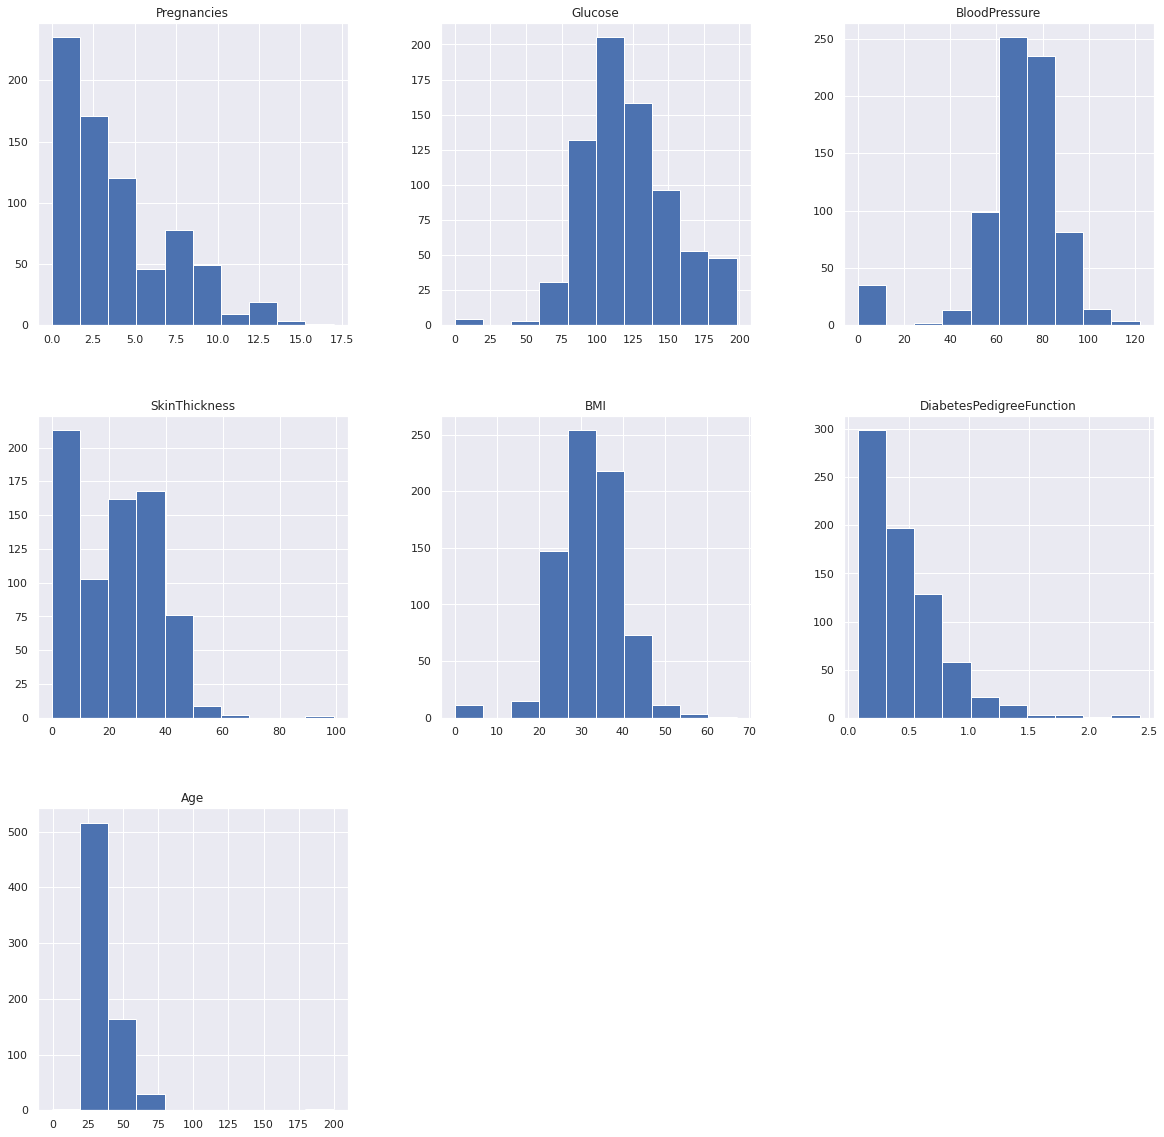

In [19]:
p = data_df.hist(figsize = (20,20))

In [43]:
print(data_df_copy.isnull().sum())


Pregnancies                 144
Glucose                      42
BloodPressure                69
SkinThickness               243
Insulin                     400
BMI                          46
DiabetesPedigreeFunction     40
Age                          51
Outcome                       0
dtype: int64


In [21]:
#removing null values

In [44]:
data_df_copy['Pregnancies'].fillna(data_df_copy['Pregnancies'].mean(), inplace = True)
data_df_copy['Glucose'].fillna(data_df_copy['Glucose'].mean(), inplace = True)
data_df_copy['BloodPressure'].fillna(data_df_copy['BloodPressure'].mean(), inplace = True)
data_df_copy['SkinThickness'].fillna(data_df_copy['SkinThickness'].median(), inplace = True)
data_df_copy['Insulin'].fillna(data_df_copy['Insulin'].median(), inplace = True)
data_df_copy['BMI'].fillna(data_df_copy['BMI'].median(),inplace = True)
data_df_copy['DiabetesPedigreeFunction'].fillna(data_df_copy['DiabetesPedigreeFunction'].mean(), inplace = True)
data_df_copy['Age'].fillna(data_df_copy['Age'].mean(), inplace = True)

In [45]:
print(data_df_copy.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [46]:
 #Plotting the data distribution plots  after removing null values



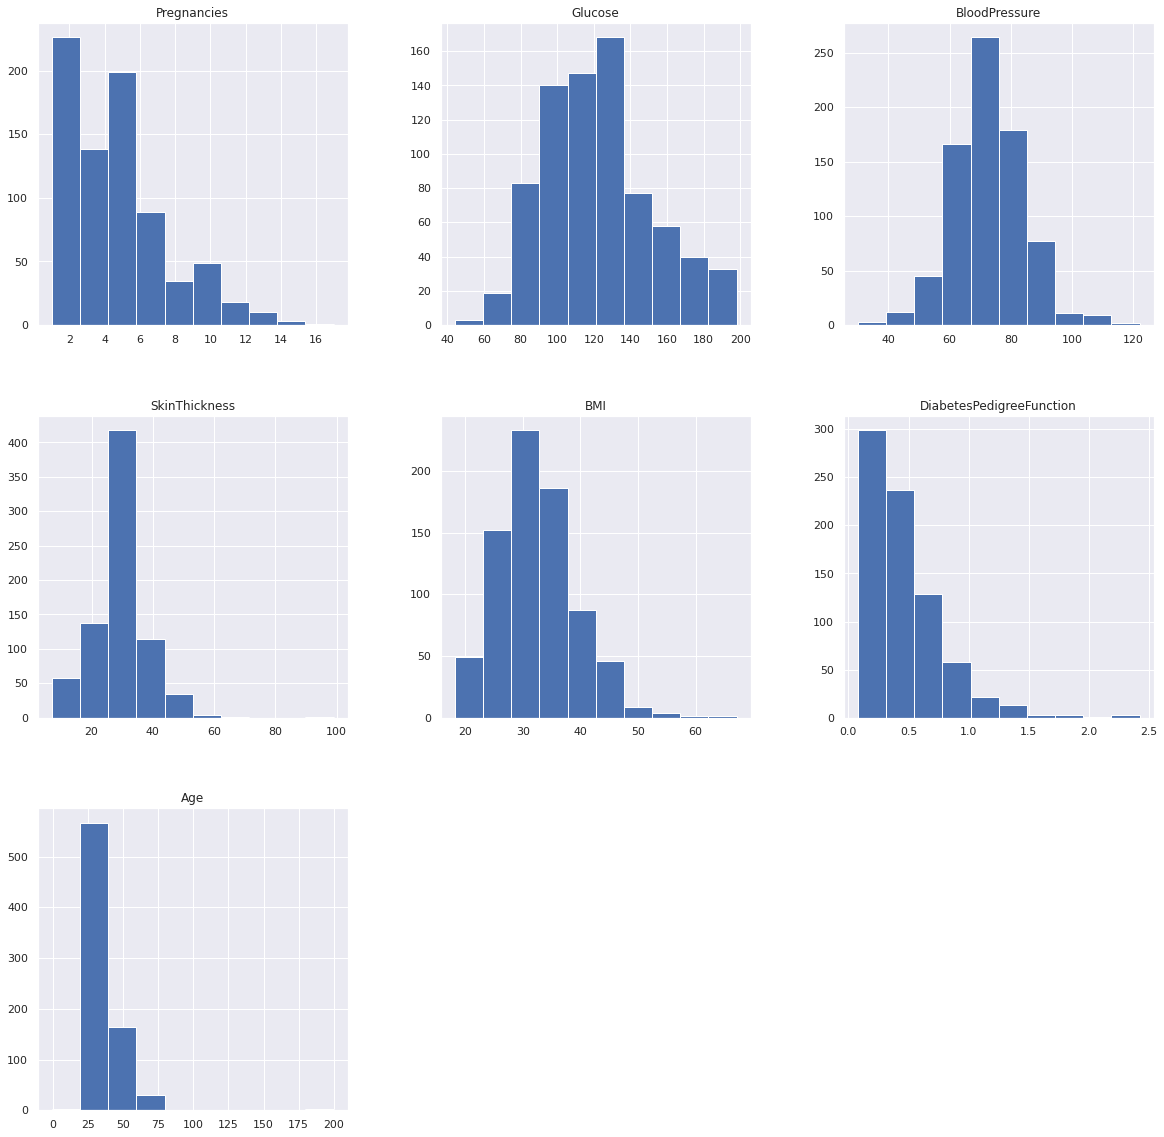

In [47]:
p = data_df_copy.hist(figsize = (20,20))

In [26]:
#Data balancing

In [58]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
color_wheel.get(2)
colors = data_df_copy["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data_df_copy.Outcome.value_counts())
p=data_df_copy.Outcome.value_counts().plot(kind="bar")

TypeError: ignored

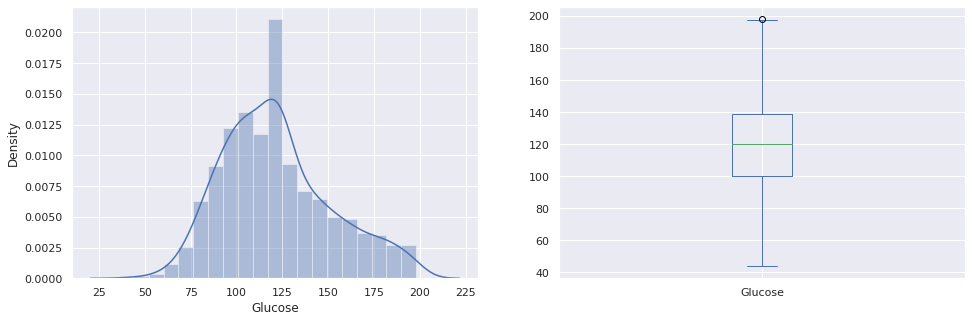

In [56]:
plt.subplot(121), sns.distplot(data_df_copy['Glucose'])
plt.subplot(122), data_df_copy['Glucose'].plot.box(figsize=(16,5))
plt.show()